In [39]:
!export CUDA_VISIBLE_DEVICES=0

import os, torch, pdb

import numpy as np 

import matplotlib.pyplot as plt
from plotly.offline import plot, init_notebook_mode, iplot

from vae_dist.dataset.dataset import FieldDataset 
from vae_dist.core.training_utils import construct_model 
import json 
from vae_dist.data.visualize import *

init_notebook_mode(connected=True)


In [47]:



options = json.load(open('./options/options_escnn_default.json'))
log_save_dir = "./logs/_escnn_1/"
model_escnn = construct_model("escnn", options)

#options = json.load(open('./options/options_esvae_default.json'))
#log_save_dir = "./logs/log_version_esvae_1/"
#model_esvae = construct_model("esvae", options)

options = json.load(open('./options/options_cnn_default.json'))
log_save_dir = "./logs/log_version_auto_1/"
model_cnn = construct_model("auto", options)

options = json.load(open('./options/options_vae_default.json'))
log_save_dir = "./logs/log_version_vae_1/"
model_vae = construct_model("vae", options)

#model_esvae.load_model("./logs/log_version_esvae_1/model_1.ckpt")
model_cnn.load_model("./logs/log_version_auto_1/model_1.ckpt")
model_vae.load_model("./logs/log_version_vae_1/model_1.ckpt")
model_cnn.load_model("./logs/log_version_auto_1/model_1.ckpt")
model_escnn.load_model("./logs/log_version_auto_1/model_1.ckpt")

# load models to gpu
model_escnn.cuda()
#model_esvae.cuda()
model_cnn.cuda()
model_vae.cuda()

inner_dim:  4
[32, 64, 128]
in_type: [O(3)_on_R3[o3]: {irrep_0,0 (x3)}(3)] out_type: [O(3)_on_R3[o3]: {irrep_0,0 (x32)}(32)]
in_type: [O(3)_on_R3[o3]: {irrep_0,0 (x32)}(32)] out_type: [O(3)_on_R3[o3]: {irrep_0,0 (x64)}(64)]
in_type: [O(3)_on_R3[o3]: {irrep_0,0 (x64)}(64)] out_type: [O(3)_on_R3[o3]: {irrep_0,0 (x128)}(128)]
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                 [-1, 8192]               0
            Linear-2                  [-1, 100]         819,300
              ReLU-3                  [-1, 100]               0
            Linear-4                   [-1, 10]           1,010
              ReLU-5                   [-1, 10]               0
Total params: 820,310
Trainable params: 820,310
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 0.06
Params size (MB): 3.13
Estima

RuntimeError: Error(s) in loading state_dict for R3CNN:
	size mismatch for decoder.0.bias: copying a param with shape torch.Size([10]) from checkpoint, the shape in current model is torch.Size([64]).

In [37]:
dataset_test_loc = "../../data/augment_test/"
dataset_loc = "../../data/cpet/"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

dataset_test = FieldDataset(
    dataset_loc,
    transform=False,
    augmentation=False,
    standardize=True,
    log_scale=True, 
    device=device
)

dataset_aug = FieldDataset(
    dataset_test_loc, 
    transform=False, 
    augmentation=False,
    standardize=True,
    log_scale=True, 
    device=device
    )


Largest value in dataset:  1.0304299865539772
Smallest value in dataset:  -1.2890294168026475
Largest value in dataset:  1.1280309724831943
Smallest value in dataset:  -1.5775816863113294


In [17]:
# get latent space on full set 
latent_space_escnn = get_latent_space(model_escnn, dataset_test, comp=[1, 1], latent_dim=10)
#latent_space_esvae = get_latent_space(model_esvae, dataset_test, comp=[0, 1], latent_dim=2)
latent_space_cnn = get_latent_space(model_cnn, dataset_test, comp=[0, 1], latent_dim=2)
latent_space_vae = get_latent_space(model_vae, dataset_test, comp=[0, 1], latent_dim=2)
# get latent space on test flip set 
aug_space_escnn = get_latent_space(model_escnn, dataset_aug, comp=[1, 1], latent_dim=10)
#aug_space_esvae = get_latent_space(model_esvae, dataset_aug, comp=[0, 1], latent_dim=2)
aug_space_cnn = get_latent_space(model_cnn, dataset_aug, comp=[0, 1], latent_dim=2)
aug_space_vae = get_latent_space(model_vae, dataset_aug, comp=[0, 1], latent_dim=2)




Total number of fields:  187
Total number of fields:  187
Total number of fields:  187
Total number of fields:  9
Total number of fields:  9
Total number of fields:  9


In [40]:
# print len of every set
print("Length of latent space: ", len(latent_space_escnn))
print("Length of augmented space: ", len(aug_space_escnn))

# print len of every set
#print("Length of latent space: ", len(latent_space_esvae))
#print("Length of augmented space: ", len(aug_space_esvae))

# print len of every set
print("Length of latent space: ", len(latent_space_cnn))
print("Length of augmented space: ", len(aug_space_cnn))

# print len of every set
print("Length of latent space: ", len(latent_space_vae))
print("Length of augmented space: ", len(aug_space_vae))

Length of latent space:  187
Length of augmented space:  9
Length of latent space:  187
Length of augmented space:  9
Length of latent space:  187
Length of augmented space:  9


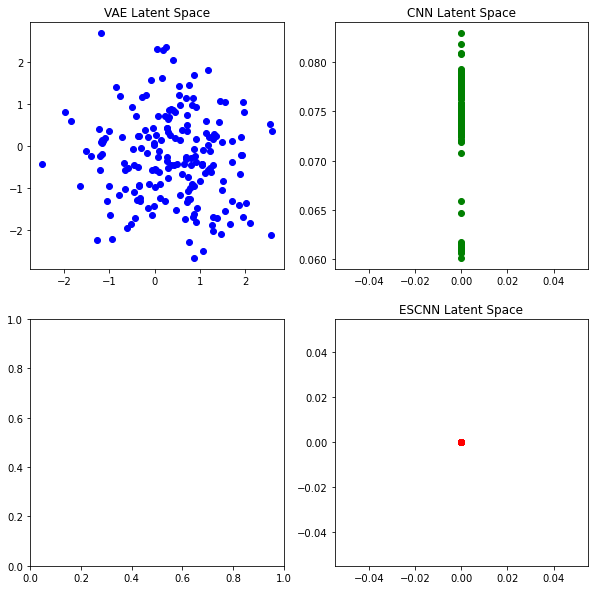

In [43]:
# plot latent space of each model in subplots with titles 
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(latent_space_vae[:, 0], latent_space_vae[:, 1], c="blue", label="test")
axs[0, 0].set_title("VAE Latent Space")
axs[0, 1].scatter(latent_space_cnn[:, 0], latent_space_cnn[:, 1], c="green", label="test")
axs[0, 1].set_title("CNN Latent Space")
#axs[1, 0].scatter(latent_space_esvae[:, 0], latent_space_esvae[:, 1], c="orange", label="test")
#axs[1, 0].set_title("ESVAE Latent Space")
axs[1, 1].scatter(latent_space_escnn[:, 0], latent_space_escnn[:, 1], c="red", label="test")
axs[1, 1].set_title("ESCNN Latent Space")
plt.show()


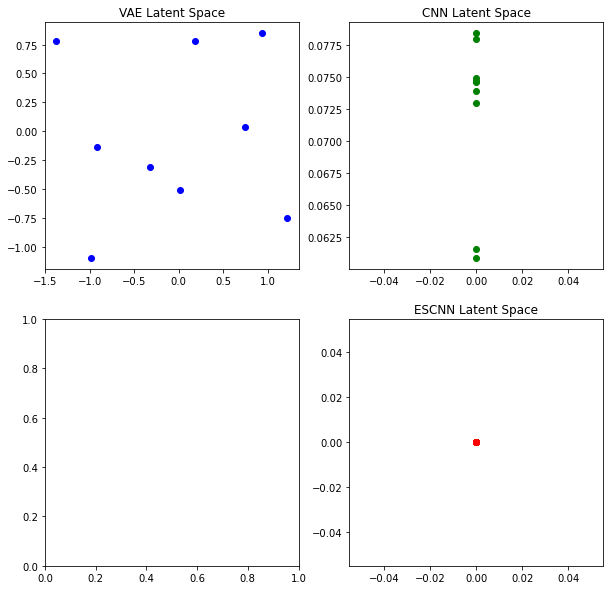

In [44]:
# repeat with augmented data
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(aug_space_vae[:, 0], aug_space_vae[:, 1], c="blue", label="test")
axs[0, 0].set_title("VAE Latent Space")
axs[0, 1].scatter(aug_space_cnn[:, 0], aug_space_cnn[:, 1], c="green", label="test")
axs[0, 1].set_title("CNN Latent Space")
#axs[1, 0].scatter(aug_space_esvae[:, 0], aug_space_esvae[:, 1], c="orange", label="test")
#axs[1, 0].set_title("ESVAE Latent Space")
axs[1, 1].scatter(aug_space_escnn[:, 0], aug_space_escnn[:, 1], c="red", label="test")
axs[1, 1].set_title("ESCNN Latent Space")
plt.show()

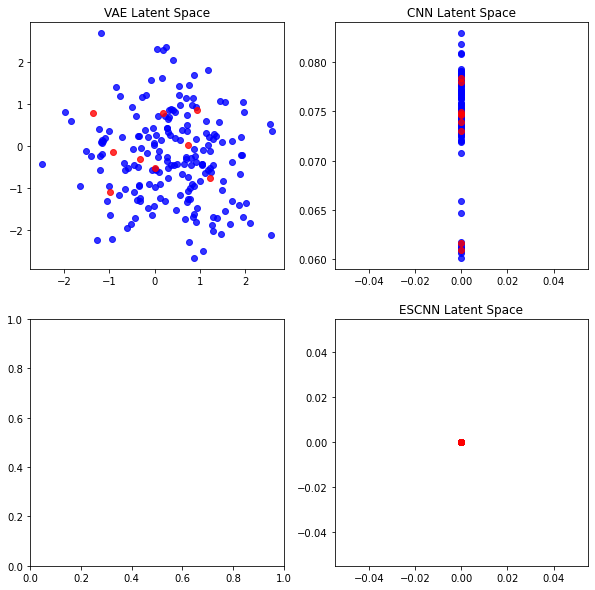

In [45]:
# plot both together
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(latent_space_vae[:, 0], latent_space_vae[:, 1], c="blue", label="test", alpha=0.8)
axs[0, 0].scatter(aug_space_vae[:, 0], aug_space_vae[:, 1], c="red", label="aug", alpha=0.8)
axs[0, 0].set_title("VAE Latent Space")
axs[0, 1].scatter(latent_space_cnn[:, 0], latent_space_cnn[:, 1], c="blue", label="test", alpha=0.8)
axs[0, 1].scatter(aug_space_cnn[:, 0], aug_space_cnn[:, 1], c="red", label="aug", alpha=0.8)
axs[0, 1].set_title("CNN Latent Space")
#axs[1, 0].scatter(latent_space_esvae[:, 0], latent_space_esvae[:, 1], c="blue", label="test", alpha=0.8)
#axs[1, 0].scatter(aug_space_esvae[:, 0], aug_space_esvae[:, 1], c="red", label="aug", alpha=0.8)
#axs[1, 0].set_title("ESVAE Latent Space")
axs[1, 1].scatter(latent_space_escnn[:, 0], latent_space_escnn[:, 1], c="blue", label="test", alpha=0.8)
axs[1, 1].scatter(aug_space_escnn[:, 0], aug_space_escnn[:, 1], c="red", label="aug", alpha=0.8)
axs[1, 1].set_title("ESCNN Latent Space")
plt.show()

In [22]:
# get distance, in latent space, between all the points 
def get_distance(latent_space):
    ret_mat = np.zeros((len(latent_space), len(latent_space)))
    dist = []
    # only iterate over half of the matrix, since it's symmetric
    for i in range(len(latent_space)):
        for j in range(i, len(latent_space)):
            dist_temp = np.linalg.norm(latent_space[i] - latent_space[j])
            ret_mat[i][j] = dist_temp
            ret_mat[j][i] = dist_temp
    return ret_mat
dist_mat = get_distance(latent_space_cnn)
dist_mat_aug = get_distance(aug_space_cnn)

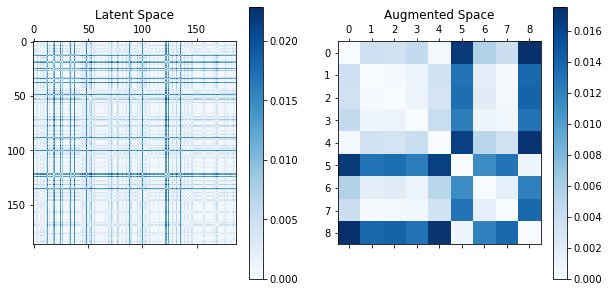

In [23]:
dist_mat = get_distance(latent_space_cnn)
dist_mat_aug = get_distance(aug_space_cnn)
# plot distance matrix as matrix for each dataset side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].matshow(dist_mat, cmap=plt.cm.Blues)
axs[0].set_title("Latent Space")
fig.colorbar(axs[0].matshow(dist_mat, cmap=plt.cm.Blues), ax=axs.ravel().tolist()[0], shrink=0.5)

axs[1].matshow(dist_mat_aug, cmap=plt.cm.Blues)
axs[1].set_title("Augmented Space")
# add colorbar to each subplot
fig.colorbar(axs[1].matshow(dist_mat_aug, cmap=plt.cm.Blues), ax=axs.ravel().tolist()[1], shrink=0.5)
plt.show()


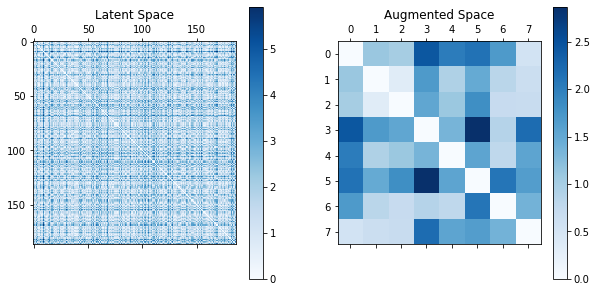

In [13]:
dist_mat = get_distance(latent_space_esvae)
dist_mat_aug = get_distance(aug_space_esvae)
# plot distance matrix as matrix for each dataset side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].matshow(dist_mat, cmap=plt.cm.Blues)
axs[0].set_title("Latent Space")
fig.colorbar(axs[0].matshow(dist_mat, cmap=plt.cm.Blues), ax=axs.ravel().tolist()[0], shrink=0.5)

axs[1].matshow(dist_mat_aug, cmap=plt.cm.Blues)
axs[1].set_title("Augmented Space")
# add colorbar to each subplot
fig.colorbar(axs[1].matshow(dist_mat_aug, cmap=plt.cm.Blues), ax=axs.ravel().tolist()[1], shrink=0.5)
plt.show()

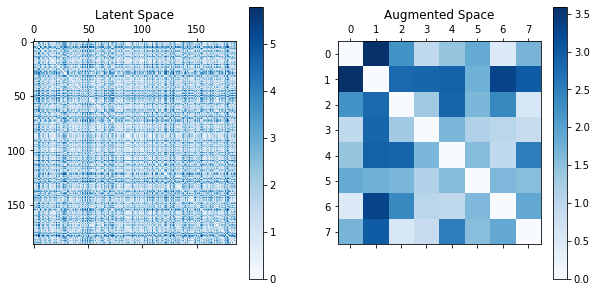

In [14]:
dist_mat = get_distance(latent_space_vae)
dist_mat_aug = get_distance(aug_space_vae)
# plot distance matrix as matrix for each dataset side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].matshow(dist_mat, cmap=plt.cm.Blues)
axs[0].set_title("Latent Space")
fig.colorbar(axs[0].matshow(dist_mat, cmap=plt.cm.Blues), ax=axs.ravel().tolist()[0], shrink=0.5)

axs[1].matshow(dist_mat_aug, cmap=plt.cm.Blues)
axs[1].set_title("Augmented Space")
# add colorbar to each subplot
fig.colorbar(axs[1].matshow(dist_mat_aug, cmap=plt.cm.Blues), ax=axs.ravel().tolist()[1], shrink=0.5)
plt.show()

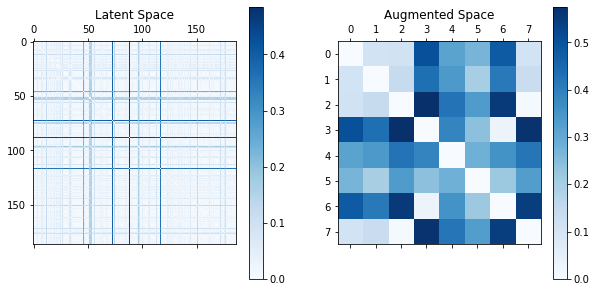

In [15]:
dist_mat = get_distance(latent_space_cnn)
dist_mat_aug = get_distance(aug_space_cnn)
# plot distance matrix as matrix for each dataset side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].matshow(dist_mat, cmap=plt.cm.Blues)
axs[0].set_title("Latent Space")
fig.colorbar(axs[0].matshow(dist_mat, cmap=plt.cm.Blues), ax=axs.ravel().tolist()[0], shrink=0.5)

axs[1].matshow(dist_mat_aug, cmap=plt.cm.Blues)
axs[1].set_title("Augmented Space")
# add colorbar to each subplot
fig.colorbar(axs[1].matshow(dist_mat_aug, cmap=plt.cm.Blues), ax=axs.ravel().tolist()[1], shrink=0.5)
plt.show()

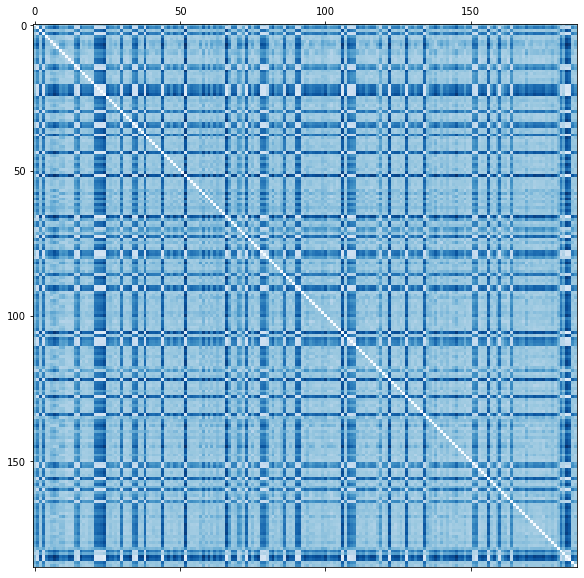

In [28]:
# read matrix from ../../data/distance_matrix_iron_set.dat
distance_loc = "../../data/distance_matrix_iron_set.dat"
distance_mat_cpet = np.loadtxt(distance_loc)
# plot matrix 
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.matshow(distance_mat_cpet, cmap=plt.cm.Blues)


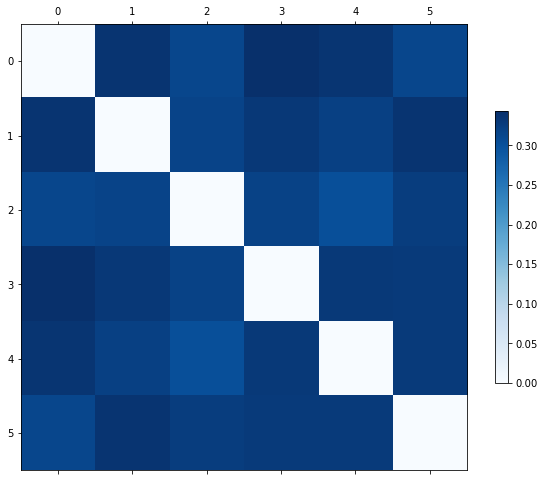

In [27]:
distance_loc = "../../data/distance_test_aug_cpet.dat"
distance_mat_cpet_aug = np.loadtxt(distance_loc)
# plot matrix 
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.matshow(distance_mat_cpet_aug, cmap=plt.cm.Blues)
# color bar
fig.colorbar(axs.matshow(distance_mat_cpet_aug, cmap=plt.cm.Blues), ax=axs, shrink=0.5)


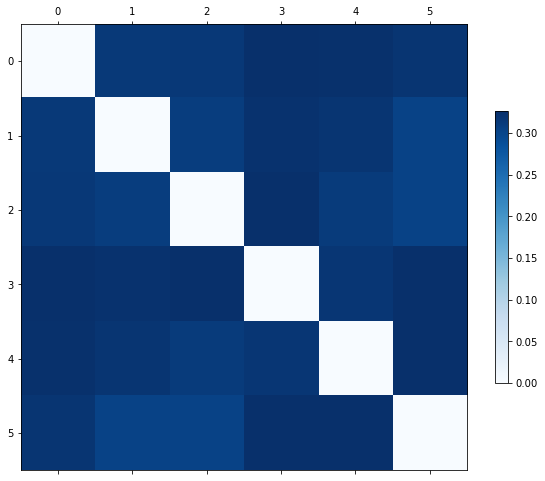

In [25]:
distance_loc = "../../data/dist_same.dat"
distance_mat_same = np.loadtxt(distance_loc)
# plot matrix 
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.matshow(distance_mat_same, cmap=plt.cm.Blues)
# color bar
fig.colorbar(axs.matshow(distance_mat_same, cmap=plt.cm.Blues), ax=axs, shrink=0.5)

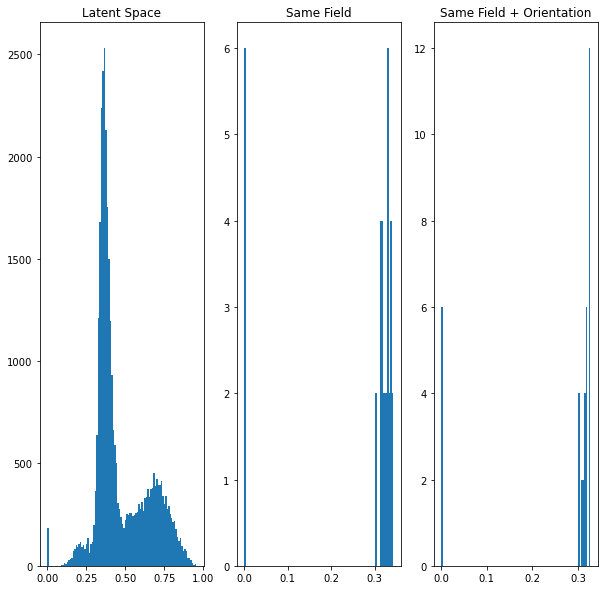

In [10]:
# plot the hist of distance_mat_cpet and distance_mat_cpet_aug
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].hist(distance_mat_cpet.flatten(), bins=100)
axs[0].set_title("Latent Space")
axs[1].hist(distance_mat_cpet_aug.flatten(), bins=100)
axs[1].set_title("Same Field")
axs[2].hist(distance_mat_same.flatten(), bins=100)
axs[2].set_title("Same Field + Orientation")
plt.show()

In [34]:
import scipy
# get first row of distance matrix and one of the computed ones and compute the correlation
def get_correlation(distance_mat, dist_mat):
    return scipy.stats.pearsonr(distance_mat[10], dist_mat[10])

# get correlation between distance matrix and computed distance matrix
dist_mat = get_distance(latent_space_escnn)
print("ESCNN: ", get_correlation(distance_mat_cpet, dist_mat)[0])
#dist_mat = get_distance(latent_space_esvae)
#print("ESVAE: ", get_correlation(distance_mat_cpet, dist_mat)[0])
dist_mat = get_distance(latent_space_cnn)
print("CNN: ", get_correlation(distance_mat_cpet, dist_mat)[0])
dist_mat = get_distance(latent_space_vae)
print("VAE: ", get_correlation(distance_mat_cpet, dist_mat)[0])


ESCNN:  nan
CNN:  0.039532976785504576
VAE:  0.06728642784640568


([<matplotlib.axis.XTick at 0x7f95c1432f60>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

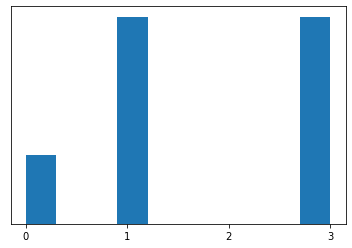

In [6]:
import matplotlib.pyplot as plt
plt.hist([0, 1, 1, 1, 3, 3, 3])
# remove frame
plt.box(True)
# remove background
# move y axis to right
plt.yticks([])
# make x axis labels integers
plt.xticks([0, 1, 2, 3])

In [23]:
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt


bernstein = lambda n, k, t: binom(n,k)* t**k * (1.-t)**(n-k)

def bezier(points, num=200):
    N = len(points)
    t = np.linspace(0, 1, num=num)
    curve = np.zeros((num, 2))
    for i in range(N):
        curve += np.outer(bernstein(N - 1, i, t), points[i])
    return curve

class Segment():
    def __init__(self, p1, p2, angle1, angle2, **kw):
        self.p1 = p1; self.p2 = p2
        self.angle1 = angle1; self.angle2 = angle2
        self.numpoints = kw.get("numpoints", 100)
        r = kw.get("r", 0.3)
        d = np.sqrt(np.sum((self.p2-self.p1)**2))
        self.r = r*d
        self.p = np.zeros((4,2))
        self.p[0,:] = self.p1[:]
        self.p[3,:] = self.p2[:]
        self.calc_intermediate_points(self.r)

    def calc_intermediate_points(self,r):
        self.p[1,:] = self.p1 + np.array([self.r*np.cos(self.angle1),
                                    self.r*np.sin(self.angle1)])
        self.p[2,:] = self.p2 + np.array([self.r*np.cos(self.angle2+np.pi),
                                    self.r*np.sin(self.angle2+np.pi)])
        self.curve = bezier(self.p,self.numpoints)


def get_curve(points, **kw):
    segments = []
    for i in range(len(points)-1):
        seg = Segment(points[i,:2], points[i+1,:2], points[i,2],points[i+1,2],**kw)
        segments.append(seg)
    curve = np.concatenate([s.curve for s in segments])
    return segments, curve

def ccw_sort(p):
    d = p-np.mean(p,axis=0)
    s = np.arctan2(d[:,0], d[:,1])
    return p[np.argsort(s),:]

def get_bezier_curve(a, rad=0.2, edgy=0):
    """ given an array of points *a*, create a curve through
    those points. 
    *rad* is a number between 0 and 1 to steer the distance of
          control points.
    *edgy* is a parameter which controls how "edgy" the curve is,
           edgy=0 is smoothest."""
    p = np.arctan(edgy)/np.pi+.5
    a = ccw_sort(a)
    a = np.append(a, np.atleast_2d(a[0,:]), axis=0)
    d = np.diff(a, axis=0)
    ang = np.arctan2(d[:,1],d[:,0])
    f = lambda ang : (ang>=0)*ang + (ang<0)*(ang+2*np.pi)
    ang = f(ang)
    ang1 = ang
    ang2 = np.roll(ang,1)
    ang = p*ang1 + (1-p)*ang2 + (np.abs(ang2-ang1) > np.pi )*np.pi
    ang = np.append(ang, [ang[0]])
    a = np.append(a, np.atleast_2d(ang).T, axis=1)
    s, c = get_curve(a, r=rad, method="var")
    x,y = c.T
    return x,y, a


def get_random_points(n=5, scale=0.8, mindst=None, rec=0):
    """ create n random points in the unit square, which are *mindst*
    apart, then scale them."""
    mindst = mindst or .7/n
    a = np.random.rand(n,2)
    d = np.sqrt(np.sum(np.diff(ccw_sort(a), axis=0), axis=1)**2)
    if np.all(d >= mindst) or rec>=200:
        return a*scale
    else:
        return get_random_points(n=n, scale=scale, mindst=mindst, rec=rec+1)

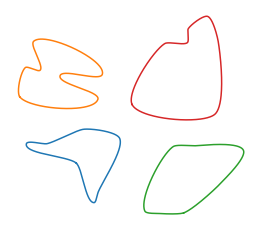

In [26]:
fig, ax = plt.subplots()
ax.set_aspect("equal")

rad = 0.2
edgy = 0.05

for c in np.array([[0,0], [0,1], [1,0], [1,1]]):

    a = get_random_points(n=7, scale=1) + c
    x,y, _ = get_bezier_curve(a,rad=rad, edgy=edgy)
    plt.plot(x,y)

plt.box(False)
plt.yticks([])
plt.xticks([])
# set resolution 
plt.savefig("bezier.png", dpi=500)
plt.show()


In [32]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


iris = datasets.load_iris()
X = iris.data
y = iris.target


# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234, max_depth=1)
model = clf.fit(X, y)



/home/santiagovargas/anaconda3/envs/bondnet_e3nn/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


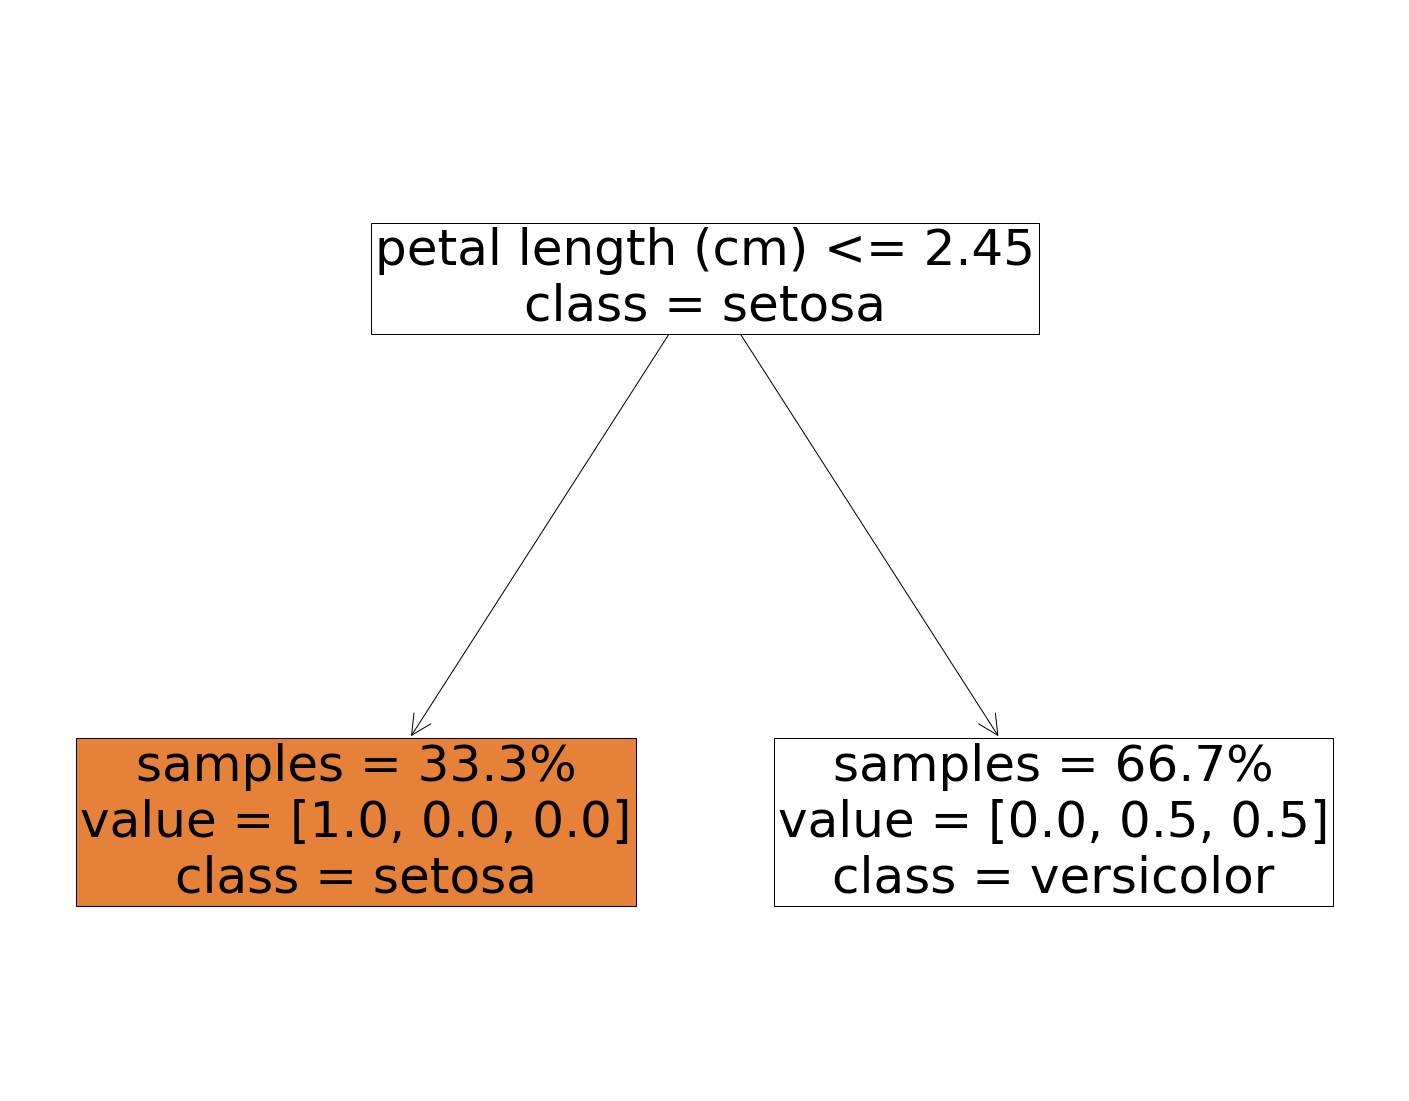

In [52]:
%matplotlib inline 
#fig = plt.figure(figsize=(25,20))
fig, ax = plt.subplots(figsize=(25,20))
import re
import matplotlib

_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True,
                   impurity=False,
                   proportion=True,
                   ax=ax,
                   fontsize=50)

def replace_text(obj):
    if type(obj) == matplotlib.text.Annotation:
        txt = obj.get_text()
        txt = re.sub("\nsamples[^$]*class","\nclass",txt)
        obj.set_text(txt)
    return obj

ax.properties()['children'] = [replace_text(i) for i in ax.properties()['children']]
fig.show()

/home/santiagovargas/anaconda3/envs/bondnet_e3nn/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

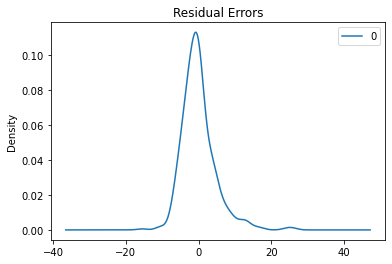

In [56]:
# make plot of residual errors 
dataset = datasets.load_boston()
import pandas as pd
from sklearn.linear_model import LinearRegression
X = dataset.data
y = dataset.target
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
residuals = [y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
residuals.plot(kind='kde')
plt.title('Residual Errors')
plt.show()
# add a title to the plot



In [59]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import residuals_plot


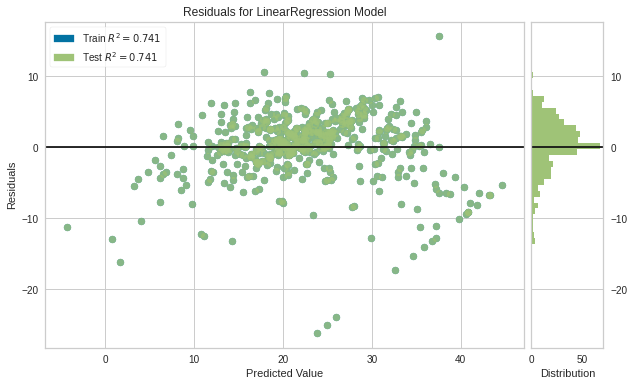

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))
viz = residuals_plot(LinearRegression(), X, y, color='b', ax = ax)
# make viz high resolution
fig.savefig('sales.png', transparent=False, dpi=500, bbox_inches="tight")


In [63]:
print(type(viz))

<class 'yellowbrick.regressor.residuals.ResidualsPlot'>
